技术分析

In [36]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
plt.style.use('ggplot')

In [37]:
sp500 = web.DataReader('^GSPC' , data_source='yahoo' , start='1/1/2000' , end='4/14/2014')
sp500.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3593 entries, 1999-12-31 to 2014-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3593 non-null   float64
 1   Low        3593 non-null   float64
 2   Open       3593 non-null   float64
 3   Close      3593 non-null   float64
 4   Volume     3593 non-null   int64  
 5   Adj Close  3593 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 196.5 KB


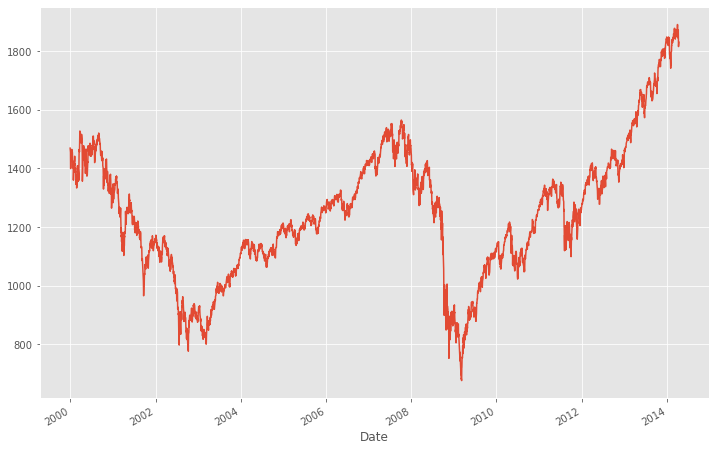

In [38]:
sp500['Close'] .plot(grid=True, figsize=(12, 8) ) 

我们要实现的趋势策略基于两俨矿( 42 个交易日)和 年( 252 个交易日)的趋势(也
就是两种期间指数水平的移动平均数) 同样. pandas 可以高效地I: =. 成各个时间序列，
并在一张图上绘制 个相关的事件序列 首先是生成趋势数据:

In [39]:
sp500['42d'] = np.round(pd.Series.rolling(sp500['Close'], window=42).mean() , 2)
sp500 ['252d'] = np.round(pd.Series.rolling(sp500['Close'], window=252).mean() , 2) 
sp500[['Close' , '42d' , '252d' ]].tail() 

,Close,42d,252d
Date,,,
2014-04-08,1851.959961,1853.88,1728.66
2014-04-09,1872.180054,1855.67,1729.79
2014-04-10,1833.079956,1856.46,1730.74
2014-04-11,1815.689941,1856.36,1731.64
2014-04-14,1830.609985,1856.63,1732.74


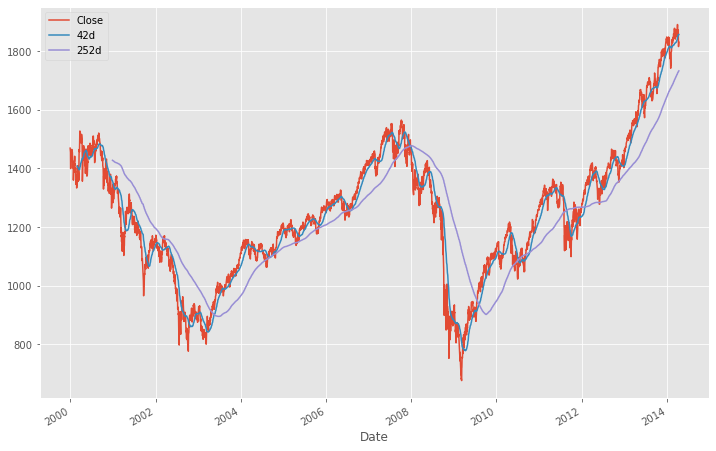

In [40]:
sp500[['Close', '42d', '252d']] .plot(grid=True, figsize=(12, 8)) 

我们的基本数据集很完整，因此现在可以设川'一条规则来生成趋势信号 规则如下:

买入信号(多头)
42 天趋势第一次高于 252 天趋势 SD

等待(持ifl)
42 天趋势在 252 天趋势的+/- SD 点也罔内

卖出信号(空头)
42 夭趋势第 次低于 252 夭趋势 SD

In [41]:
sp500 ['42-252'] = sp500 ['42d'] - sp500['252d'] 
sp500 ['42-252'].tail()

Date
2014-04-08    125.22
2014-04-09    125.88
2014-04-10    125.72
2014-04-11    124.72
2014-04-14    123.89
Name: 42-252, dtype: float64

In [42]:
sp500 ['42-252'].head()

Date
1999-12-31   NaN
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
Name: 42-252, dtype: float64

In [43]:
SD = 50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    1489
 0    1232
-1     872
Name: Regime, dtype: int64

===============
Signal regimes over time

(-1.1, 1.1)

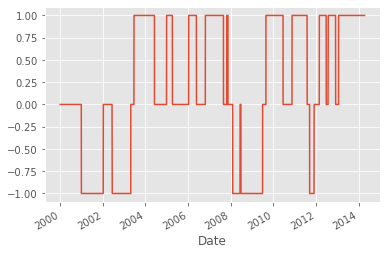

In [44]:
#import matplotlib.pyplot as plt
sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1, 1.1])

=======================对数收益率:

In [46]:
sp500['Market'] = np.log(sp500['Close'] /sp500['Close'].shift(1))
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

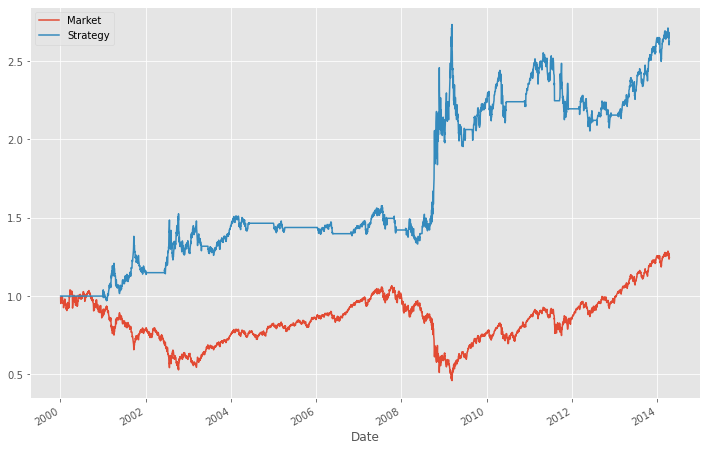

In [49]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(12, 8)) 